In [51]:
import numpy as np
import random
import pandas as pd 
np.random.seed(0)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [42]:
subpop= pd.read_csv('all_subjects_top50_duration.csv')

In [43]:
is_flex_deadline=subpop['course_duration_raw']!= 'Quick View'

In [44]:
subpop_2= subpop[is_flex_deadline]

In [45]:
def generate_duration(course_duration_raw):
  #extract hours per week
    hours_per_week_string= str(course_duration_raw[0:course_duration_raw.find('hours')-1].split('-')[0]) + ',' + str(course_duration_raw[0:course_duration_raw.find('hours')-1].split('-')[1])
  
  # extract weeks
    weeks= str(course_duration_raw[course_duration_raw.find('weeks')-3:course_duration_raw.find('weeks')]).strip()

    course_duration_raw=hours_per_week_string+ ',' + weeks
    '''
      Course_duration_raw is a string of 'start,end, week' output is the transformed feature course_duration in hours 
    '''
    temp=course_duration_raw.split(',')
    start=float(temp[0])
    end=float(temp[1])
    week=float(temp[2])
    '''
    start is the lower bound of hours per week 
      end is the upper bound of hours per week 
      week is amount of weeks needed to complete the course
    
    '''
    mid= (start+end)/2
      # 32 samples based on central limit theorem 
    random_sample_hours_per_week= np.random.normal(mid, size=32)
    duration= np.mean(random_sample_hours_per_week)*week
    
    return duration

In [47]:
test2=[None]*len(subpop_2['course_duration_raw'])

for i, item in enumerate(subpop_2['course_duration_raw']):
    test= str(item)
    temp_loop= generate_duration(test)
    test2[i]=temp_loop
    
subpop_2['course_duration_absolute']=test2

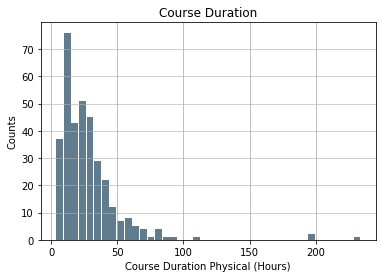

In [61]:
subpop_2['course_duration_absolute'].plot.hist(grid=True, bins=40, rwidth=0.9, color='#607c8e')
plt.title('Course Duration')
plt.ylabel('Counts')
plt.xlabel('Course Duration Physical (Hours)')
plt.grid(axis='y', alpha=0.75)

In [62]:
subpop_2['course_duration_absolute'].describe()

count    350.000000
mean      27.510394
std       24.129930
min        3.247697
25%       12.936404
50%       22.979072
75%       34.685296
max      234.184144
Name: course_duration_absolute, dtype: float64

In [64]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

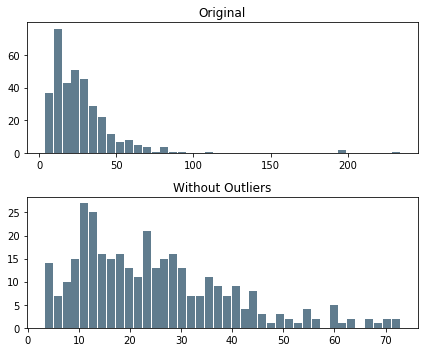

In [75]:
x=np.array(subpop_2['course_duration_absolute'])
# Keep only the "good" points
# "~" operates as a logical not operator on boolean numpy arrays
filtered = x[~is_outlier(x)]


# Plot the results
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6,5))

ax1.hist(x, bins=40, rwidth=0.9, color='#607c8e')
ax1.set_title('Original')

ax2.hist(filtered, bins=40, rwidth=0.9, color='#607c8e')
ax2.set_title('Without Outliers')

plt.tight_layout()
plt.show()